In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/Users/henrysun_1/Desktop/Duke/2024-2025/Summer 2024/fishics/data/data_for_henry_2024.csv")
data

,station_id,project,date,sampling_bout,gear,sample_grp,station,location,replicate,primers,...,Atl_herring,Atl_cod,Am_gizzard_shad,Fourspine_stickleback,Catfish_sp,White_perch,Whitefish_Cor,Pac_sand_lance,White_catfish,Atl_salmon
0,NJOT_Aug_23_100,NJOT,8/1/23,Aug_23,edna,Trawl,100,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,NJOT_Aug_23_101,NJOT,8/1/23,Aug_23,edna,Trawl,101,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,NJOT_Aug_23_102,NJOT,8/1/23,Aug_23,edna,Trawl,102,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,NJOT_Aug_23_103,NJOT,8/1/23,Aug_23,edna,Trawl,103,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,NJOT_Aug_23_104,NJOT,8/1/23,Aug_23,edna,Trawl,104,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,NJOT_Jun_23_66,NJOT,6/1/23,Jun_23,edna,Trawl,66,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.004703
85,NJOT_Jun_23_67,NJOT,6/1/23,Jun_23,edna,Trawl,67,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
86,NJOT_Jun_23_68,NJOT,6/1/23,Jun_23,edna,Trawl,68,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.002109,0.0,0.0,0.0,0.000000
87,NJOT_Jun_23_69,NJOT,6/1/23,Jun_23,edna,Trawl,69,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


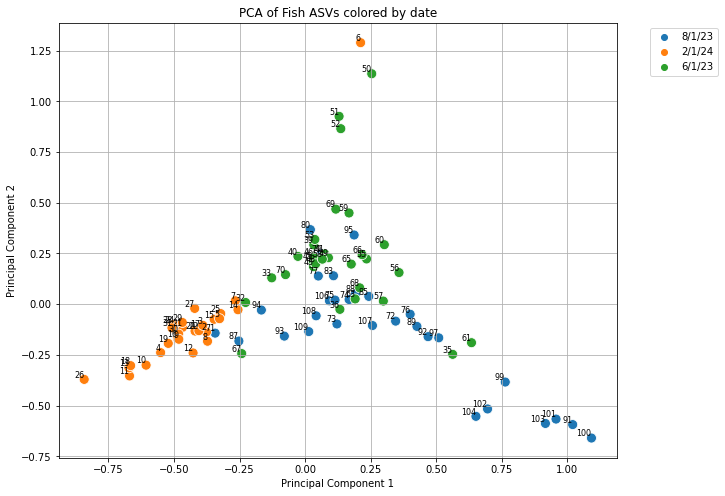

In [5]:
# Extract the relevant columns for PCA (columns L to CH, which are the fish ASVs)
fish_asvs = data.iloc[:, 11:]

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(fish_asvs)

# Add PCA results to the dataframe
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# color by date
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='PCA1', y='PCA2', data=data, hue='date', s=100, palette='tab10')
# plt.title('PCA of Fish ASVs colored by date')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=data, hue='date', s=100, palette='tab10')

# Annotate points with station numbers
for i, station in enumerate(data['station']):
    plt.annotate(station, (data['PCA1'].iloc[i], data['PCA2'].iloc[i]), fontsize=8, color='black', ha='right', va='bottom')

plt.title('PCA of Fish ASVs colored by date')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Outlier station 6

Station 6 is an outlier across both plots. Appears to be much more similar to data in the summer
NorSeaRob 0.028368794
Am_butterfish 0.822695035
FourSpot Flounder 0.14893617

In [8]:
data['PCA1']
# data['PCA2']

0    -0.466561
1    -0.400474
2    -0.365243
3    -0.415707
4    -0.390950
        ...   
84    0.172533
85   -0.172345
86    0.056947
87    0.331073
88    0.102831
Name: PCA2, Length: 89, dtype: float64

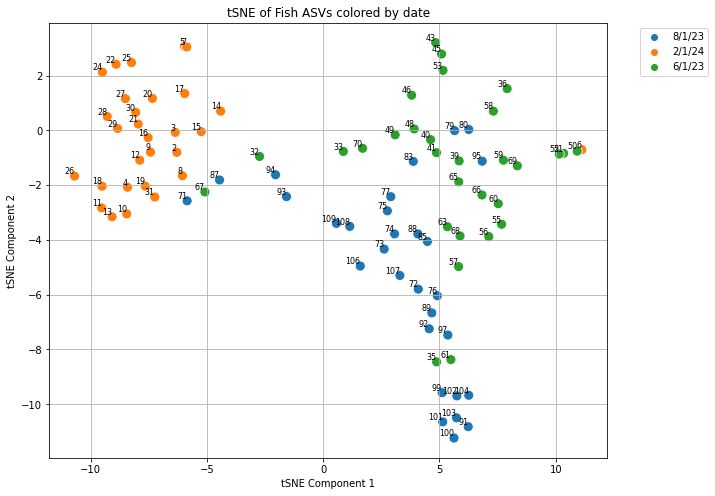

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=20, n_iter=5000) #test with diff perplexity
tsne_result = tsne.fit_transform(fish_asvs)
# Perform t-SNE

# Add t-SNE results to the dataframe
data['tSNE1'] = tsne_result[:, 0]
data['tSNE2'] = tsne_result[:, 1]

# plt.figure(figsize=(12, 8))
# sns.scatterplot(x='tSNE1', y='tSNE2', data=data, hue='date', s=100, palette='tab10')
# plt.title('t-SNE of Fish ASVs colored by Date')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()


plt.figure(figsize=(10, 8))
sns.scatterplot(x='tSNE1', y='tSNE2', data=data, hue='date', s=100, palette='tab10')

# Annotate points with station numbers
for i, station in enumerate(data['station']):
    plt.annotate(station, (data['tSNE1'].iloc[i], data['tSNE2'].iloc[i]), fontsize=8, color='black', ha='right', va='bottom')

plt.title('tSNE of Fish ASVs colored by date')
plt.xlabel('tSNE Component 1')
plt.ylabel('tSNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



In [18]:
data['tSNE1']

0     -9.958057
1    -10.234078
2    -11.461009
3    -12.095788
4    -12.855007
        ...    
84   -12.844982
85    11.714600
86   -10.561341
87   -15.046569
88     0.966592
Name: tSNE1, Length: 89, dtype: float32